In [1]:
import torchvision.models as models
from torch import nn
import torch
from models.adain_sf import AdaINTransfer
import os
from PIL import Image
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image
from data.unnormalize import UnNormalize

In [24]:
content_image = Image.open("./content_test2.jpg").convert("RGB")
style_image = Image.open("./style_test2.jpg").convert("RGB")

In [25]:
transform = transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.ToTensor(),
            # transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
        ])

In [26]:
content = transform(content_image).unsqueeze(0)
style = transform(style_image).unsqueeze(0)

In [27]:
model = AdaINTransfer(add_bn = False, opensrc_pretrained = True)

In [28]:
model.load_state_dict(torch.load("./checkpoints/last_model_trained_159999.pt")["model_state_dict"])

<All keys matched successfully>

In [29]:
model.eval()
with torch.no_grad():
    output = model.style_transfer(content, style, alpha = 0.3)

In [30]:
image = to_pil_image(output.squeeze(0))

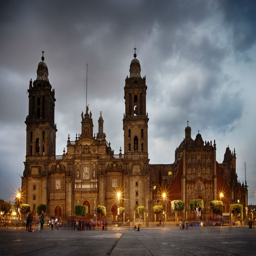

In [31]:
content_image.resize((256, 256))

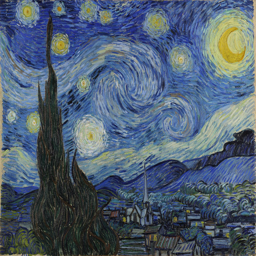

In [32]:
style_image.resize((256, 256))

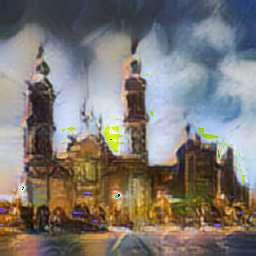

In [33]:
image